# Explore here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
local_csv_raw = "bank-marketing-campaign-data.csv"
df = pd.read_csv(local_csv_raw, sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("Data Frame Info")
df.info()

Data Frame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx  

In [4]:
print("Data Frame null values")
print(df.isnull().sum().sort_values(ascending=False))

Data Frame null values
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
print("Data Frame duplicate rows")
print(df.duplicated().sum())

Data Frame duplicate rows
12


In [6]:
print("Data Frame shape")
print(df.shape)

Data Frame shape
(41188, 21)


In [7]:
print("Data Frame Description")
df.describe()

Data Frame Description


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
print("Data Frame Descriptive Statistics")
for column in df.columns:
    print(f"{column}:")
    print(df[column].describe())

Data Frame Descriptive Statistics
age:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
job:
count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object
marital:
count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object
education:
count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object
default:
count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object
housing:
count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object
loan:
count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object
contact:
count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype

Categorical variables:


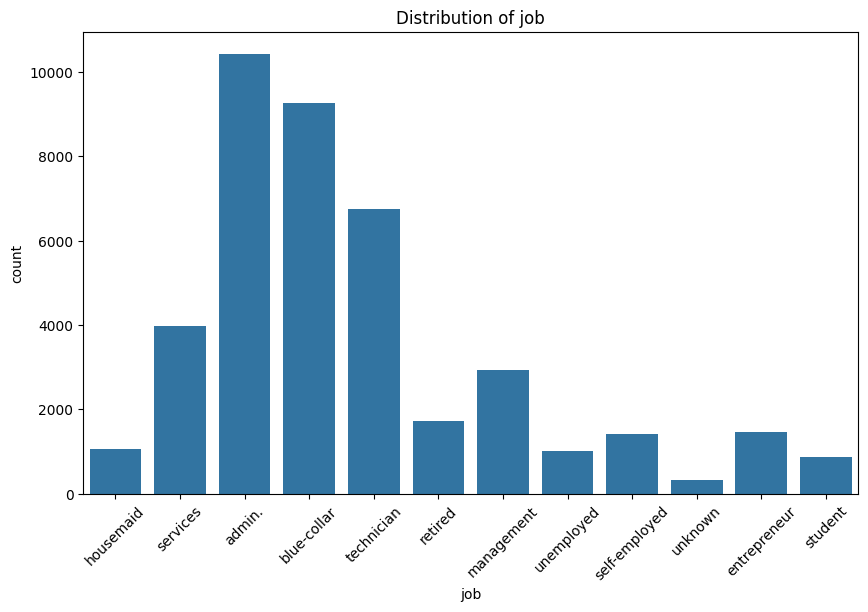

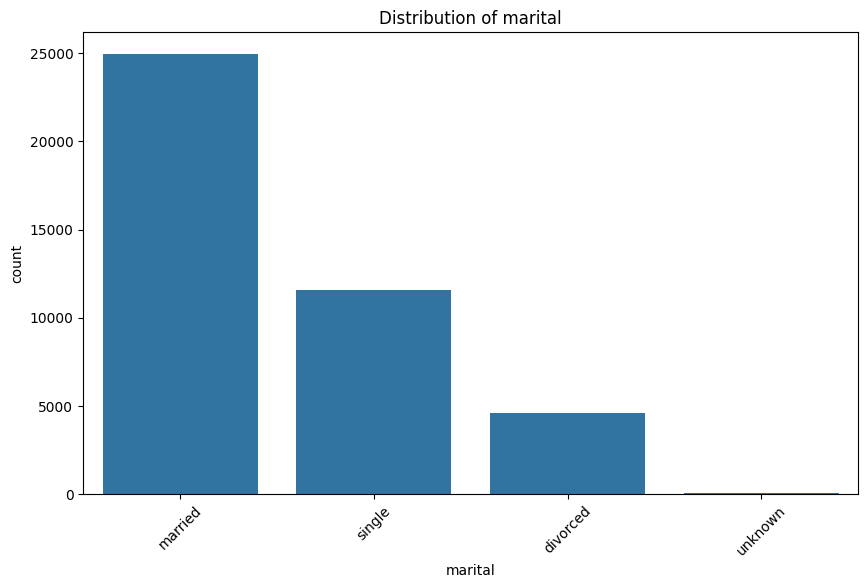

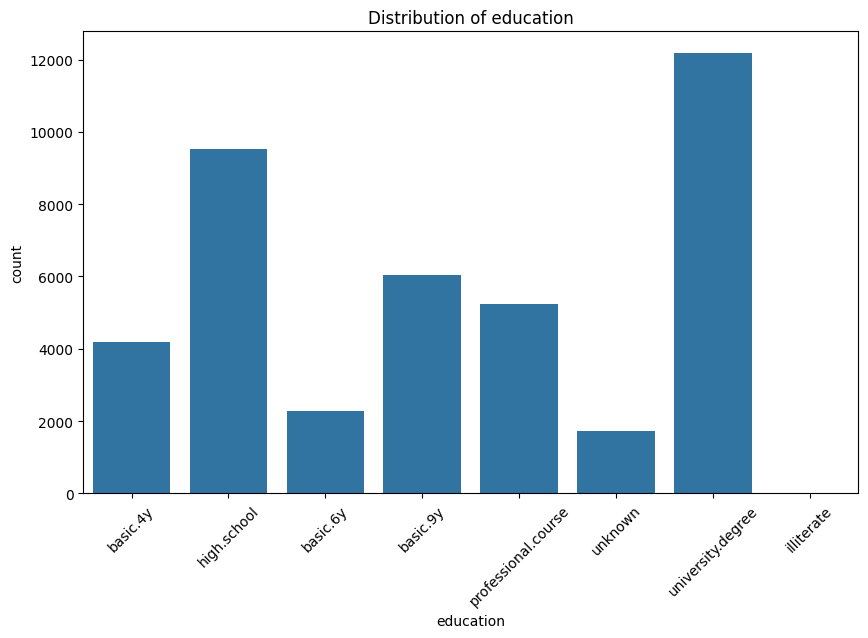

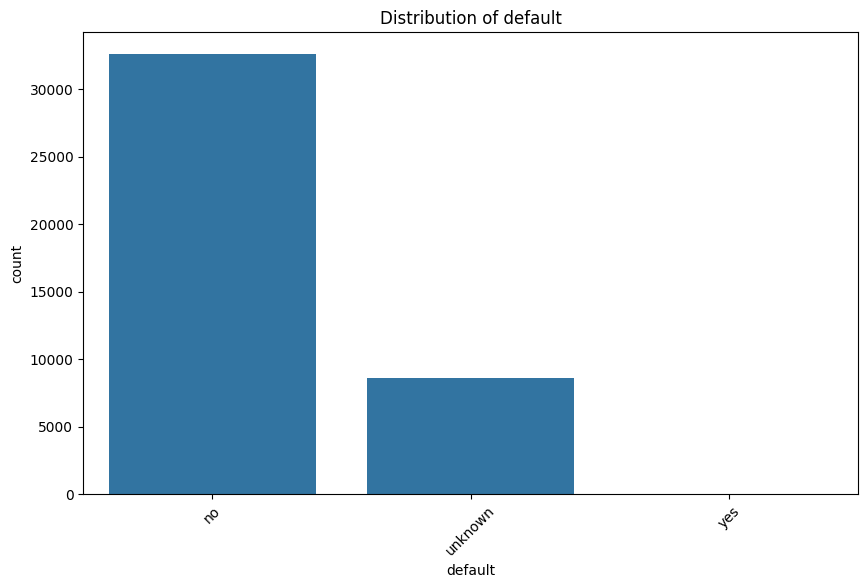

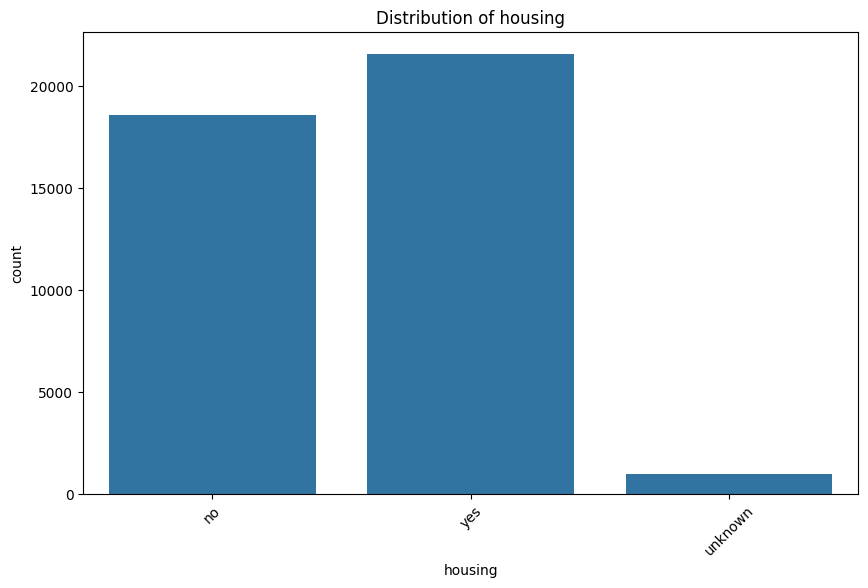

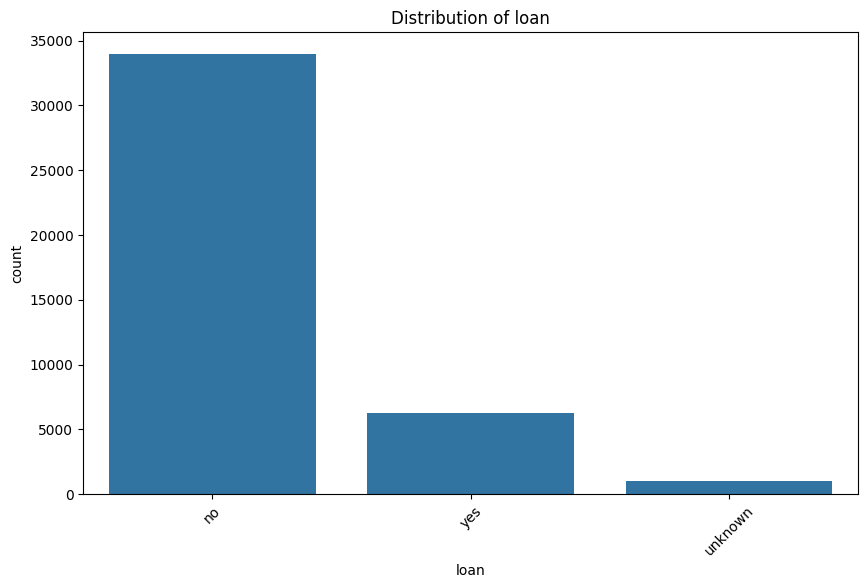

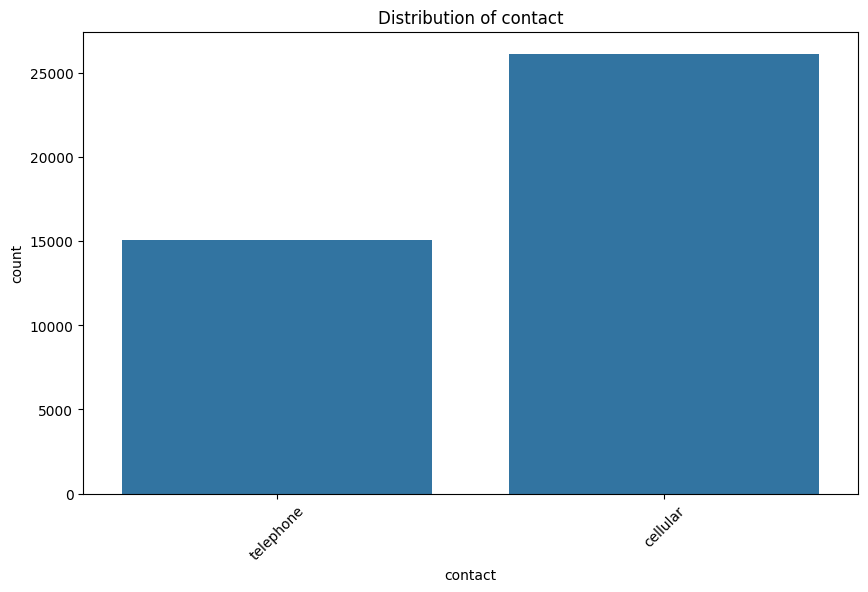

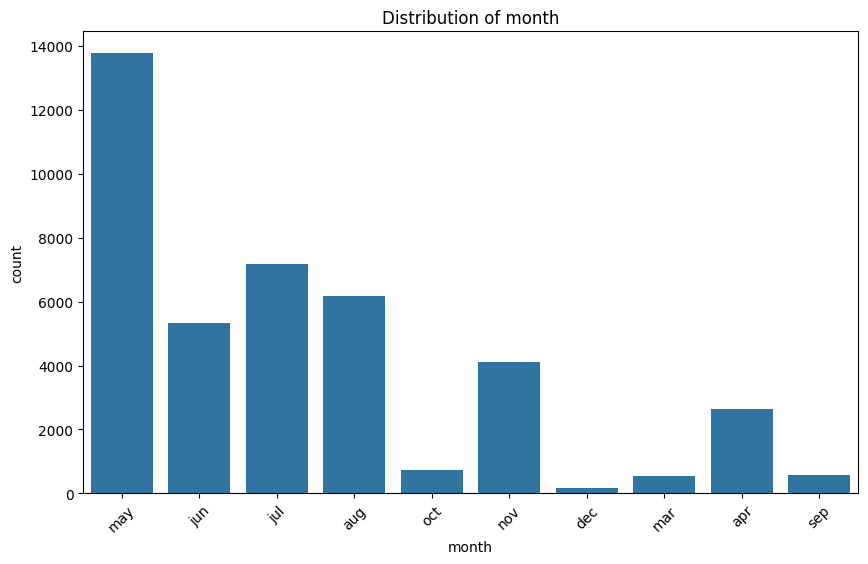

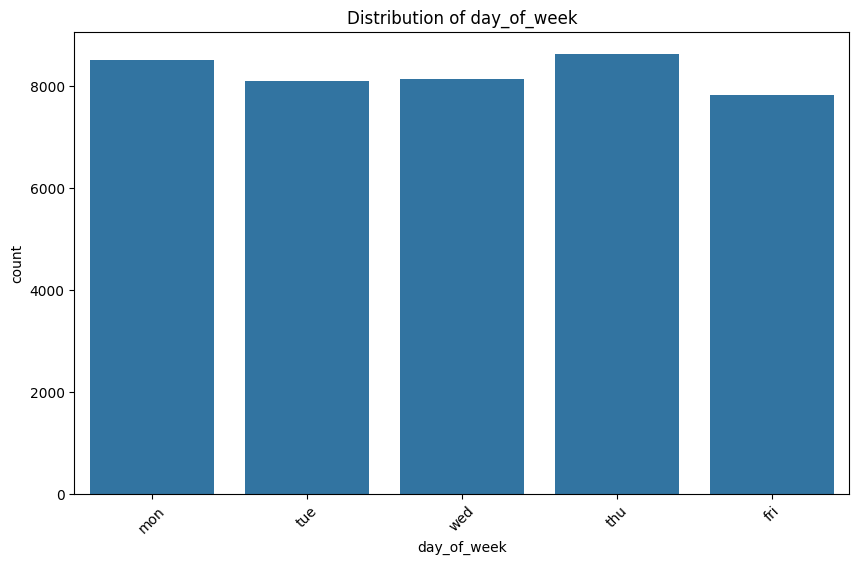

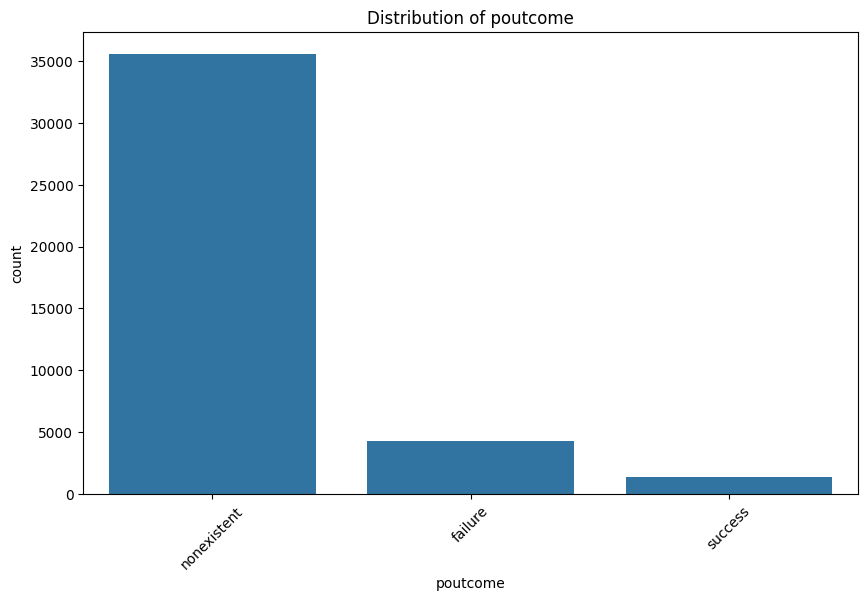

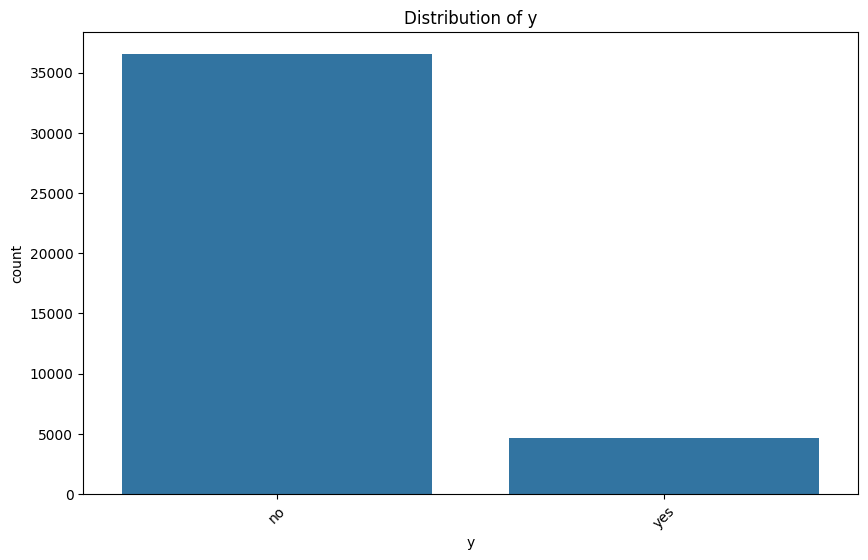

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical variables:")
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

Numerical variables:


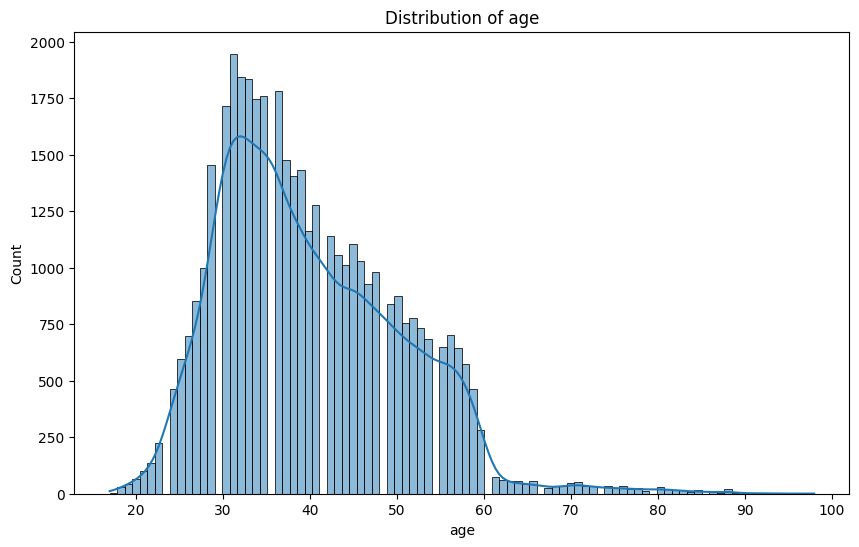

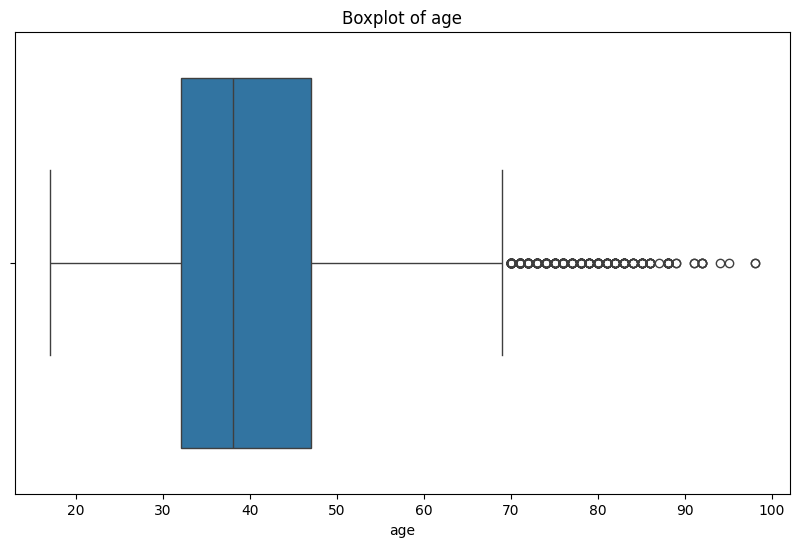

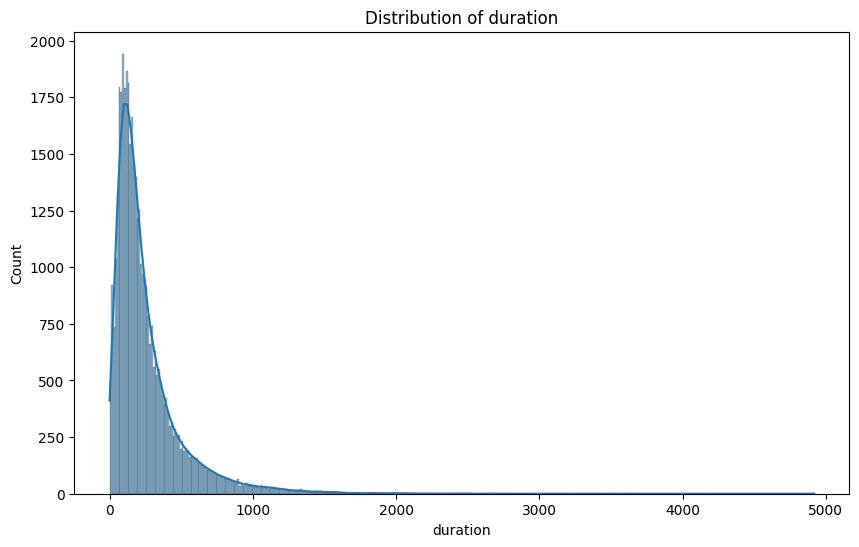

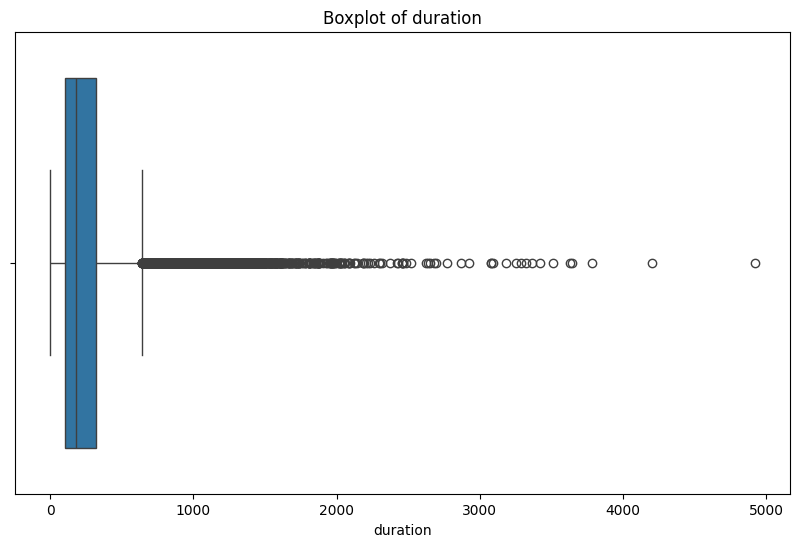

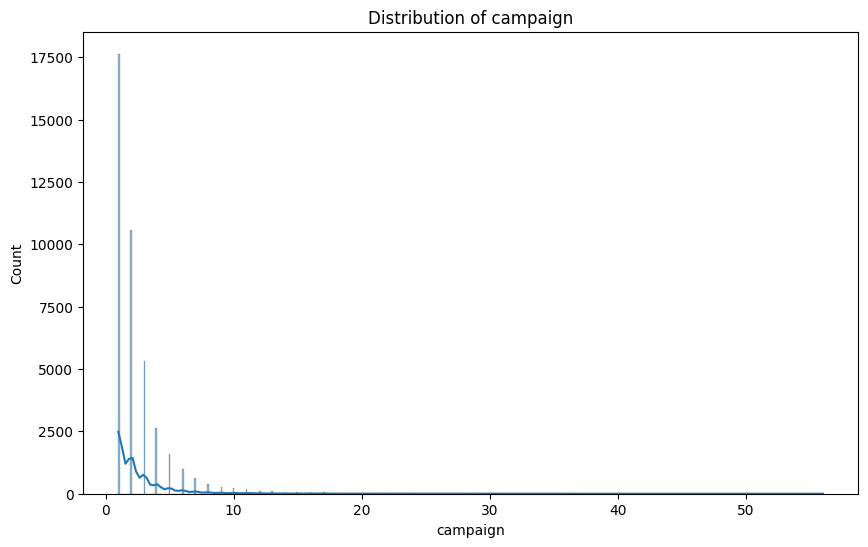

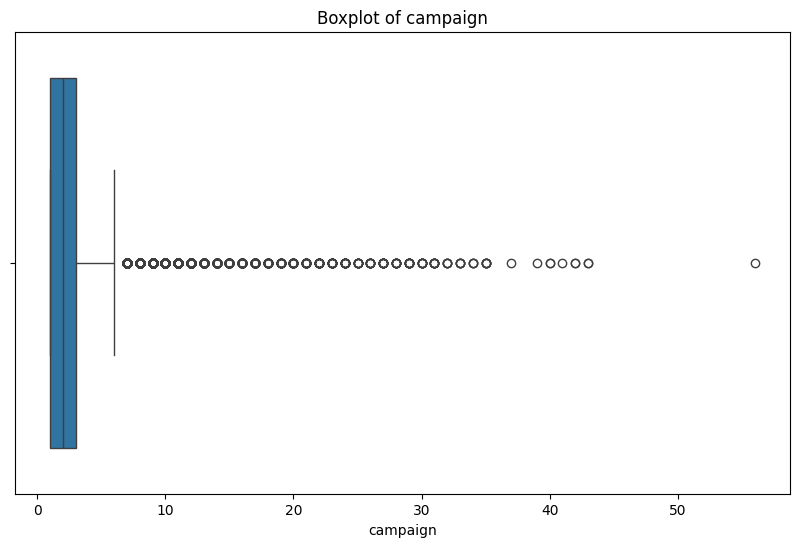

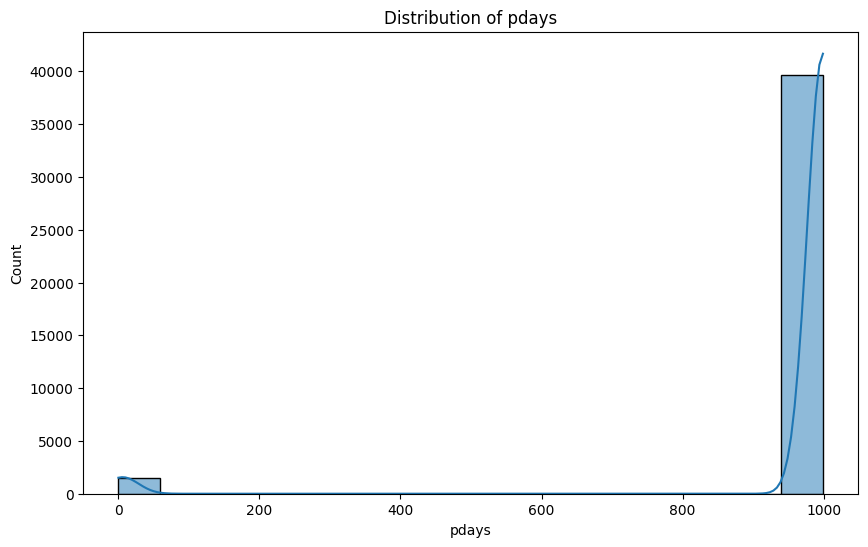

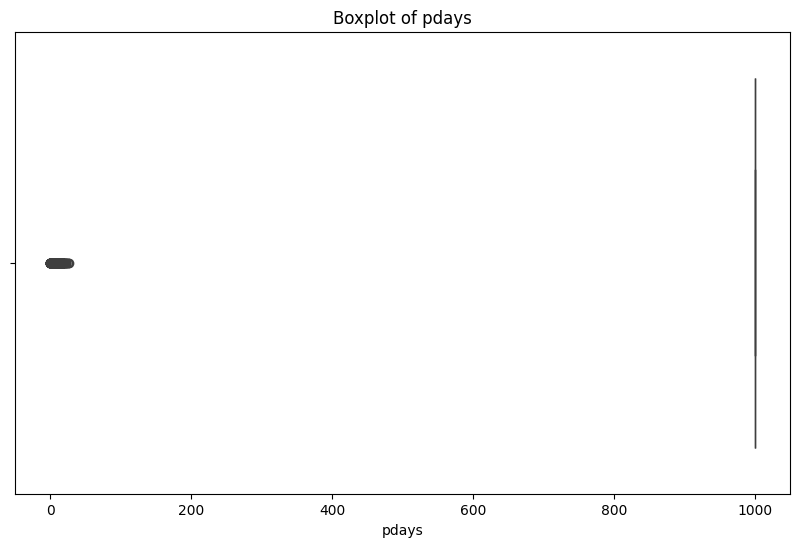

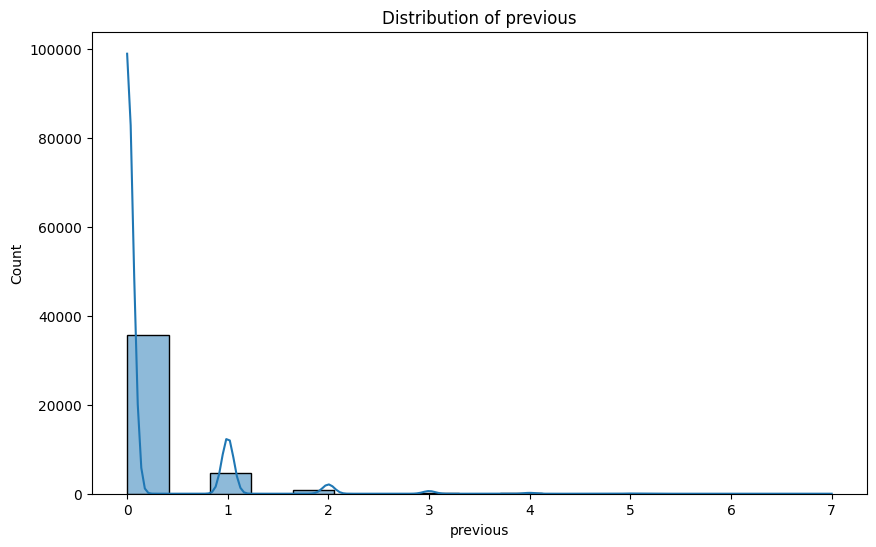

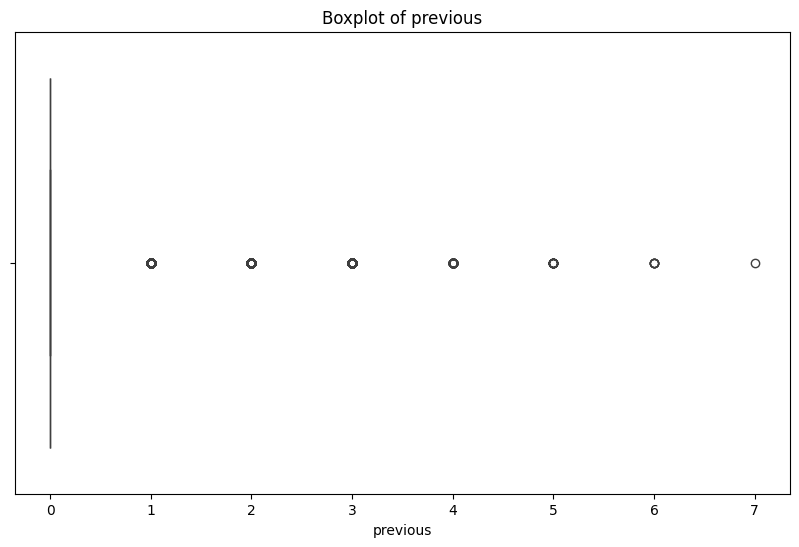

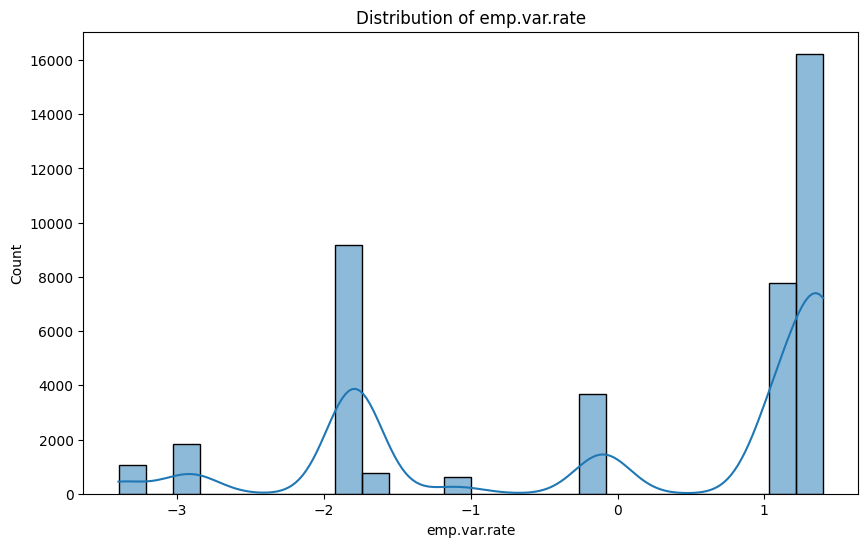

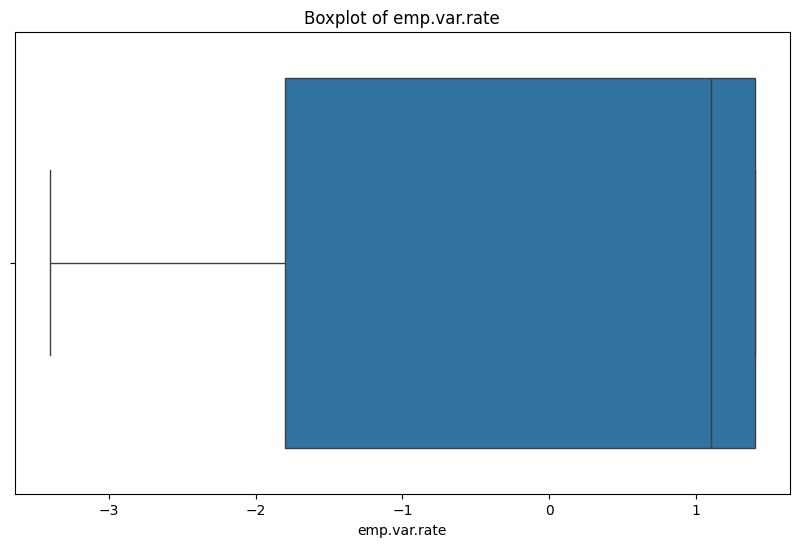

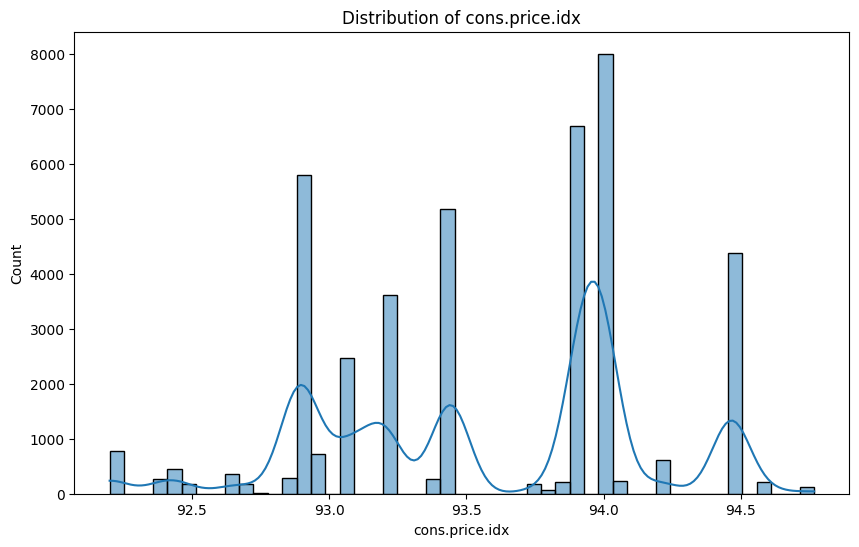

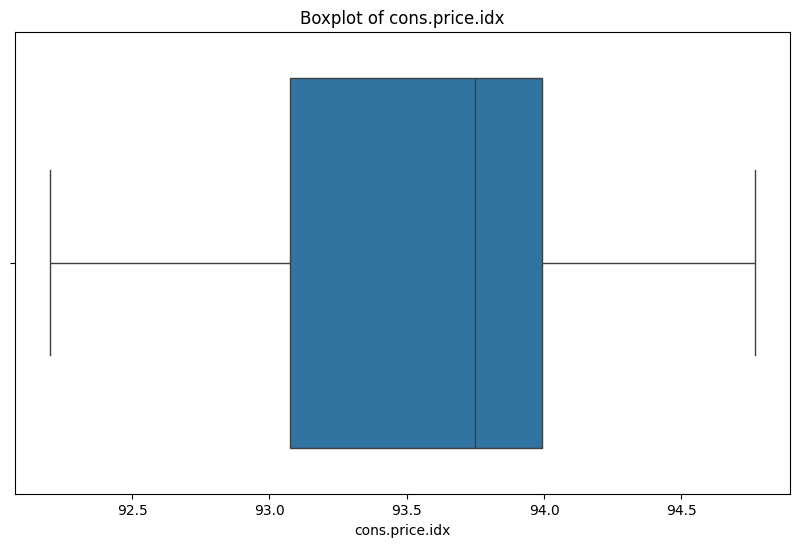

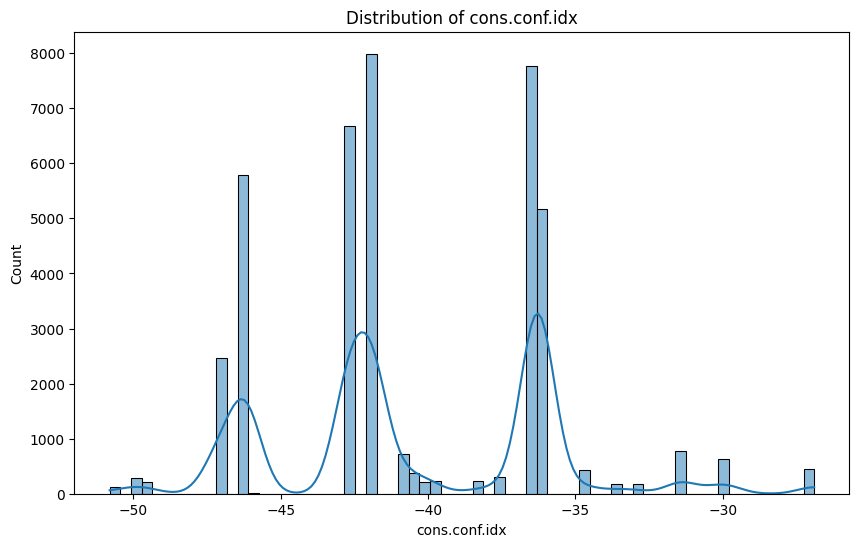

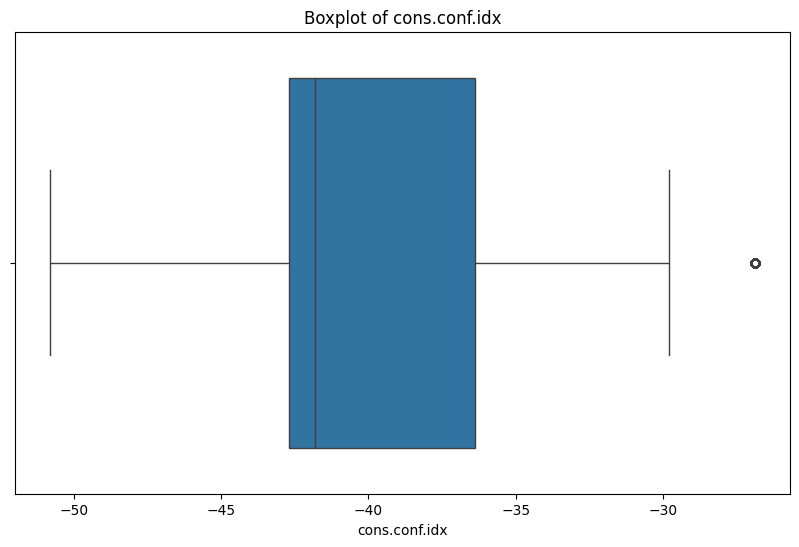

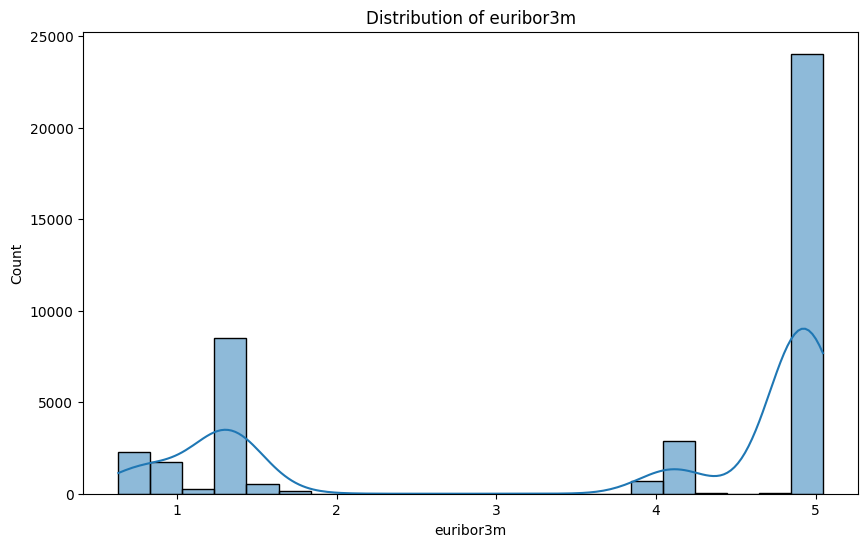

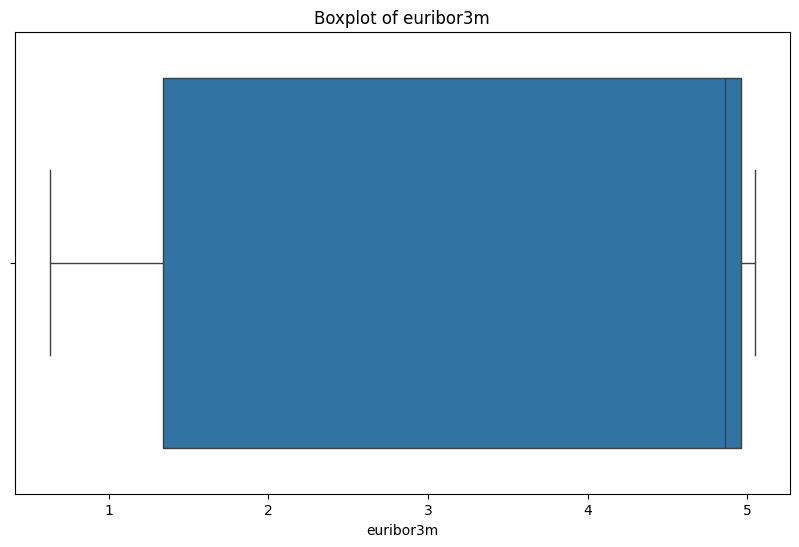

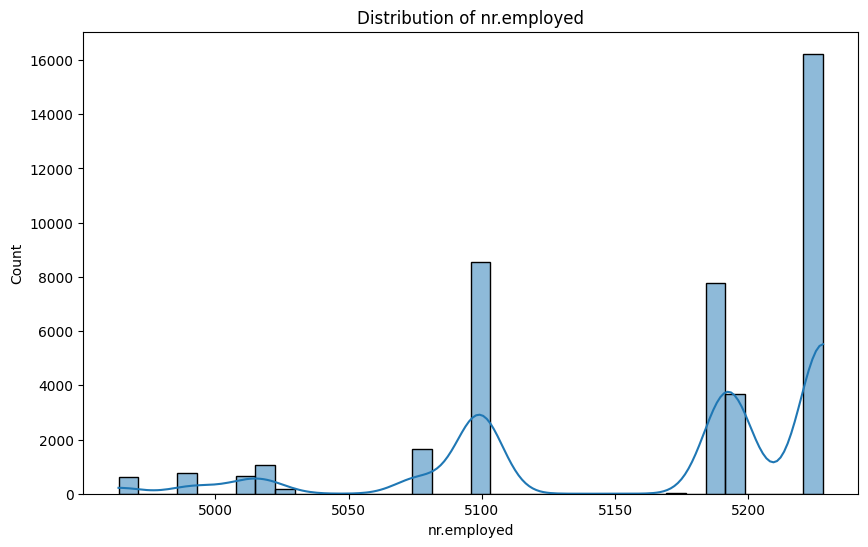

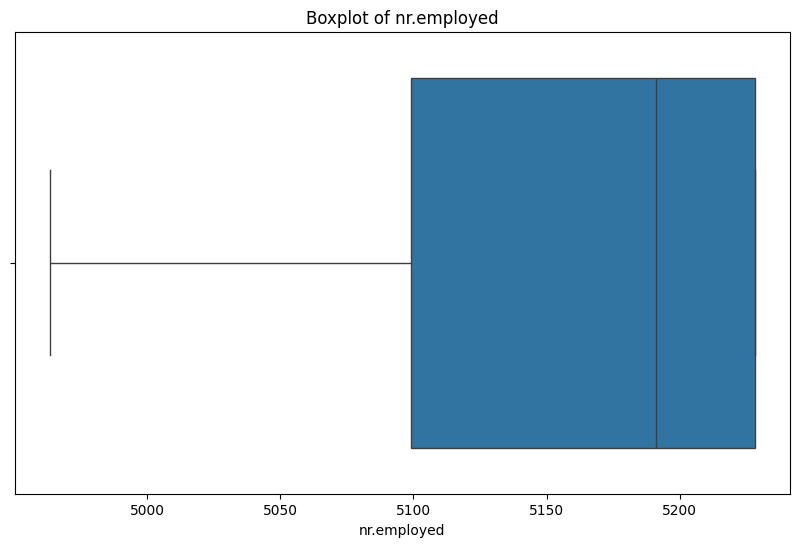

In [10]:
print("Numerical variables:")
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot of {column}")
    plt.show()

Correlation matrix:


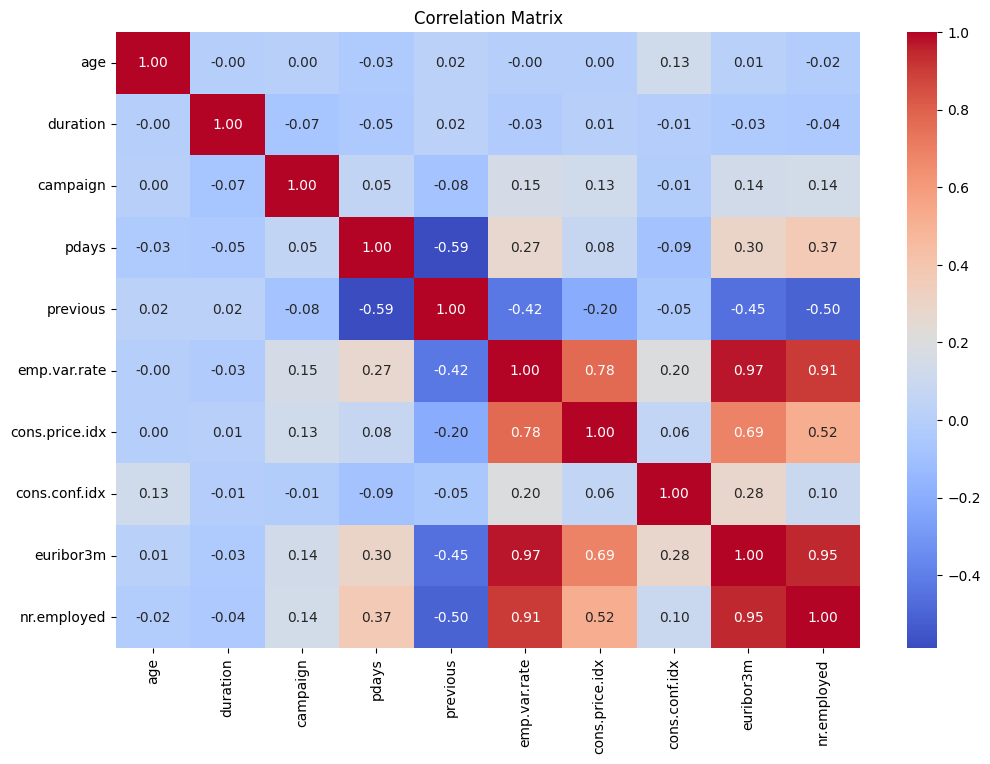

In [11]:
print("Correlation matrix:")
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


categorical vs y


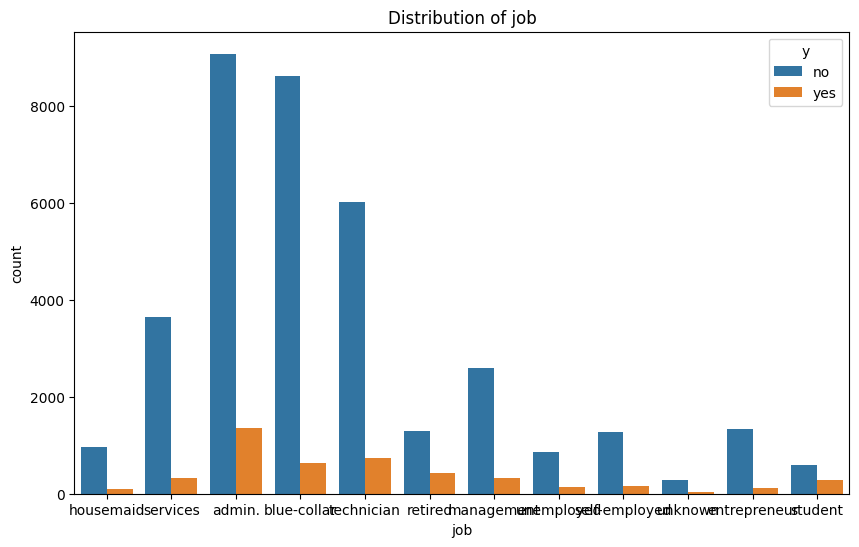

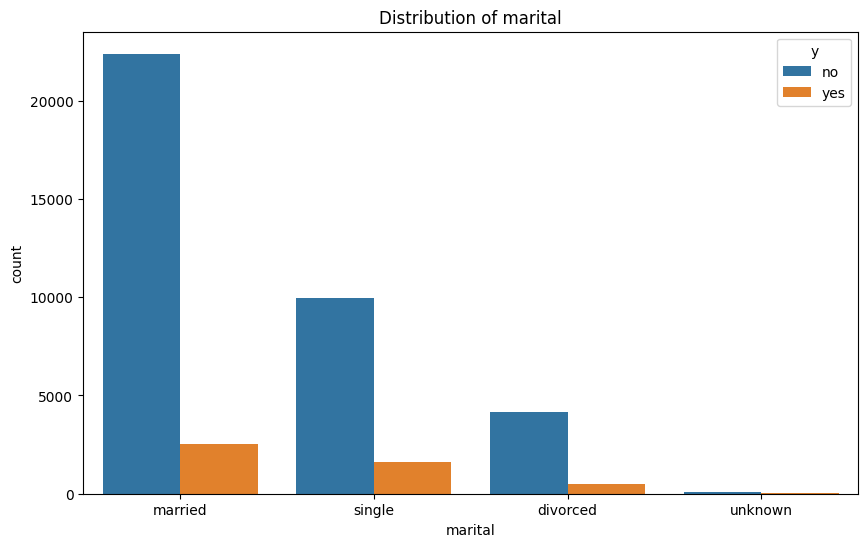

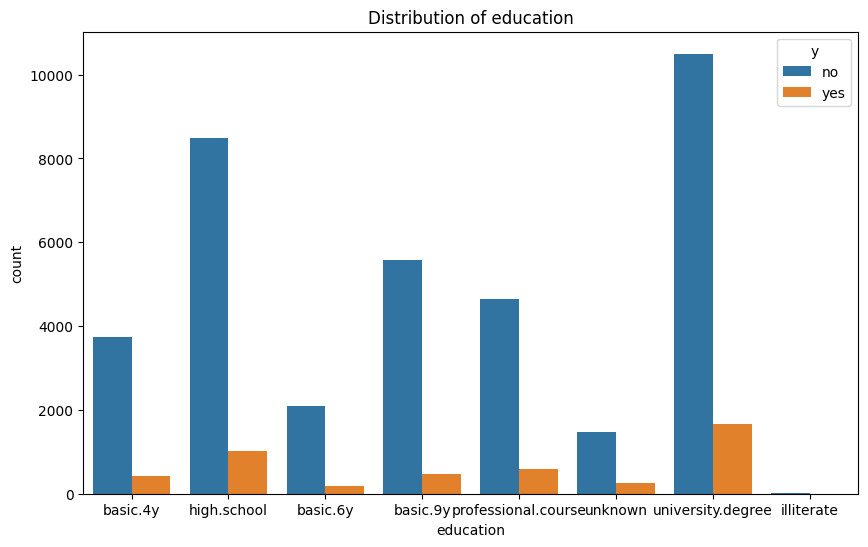

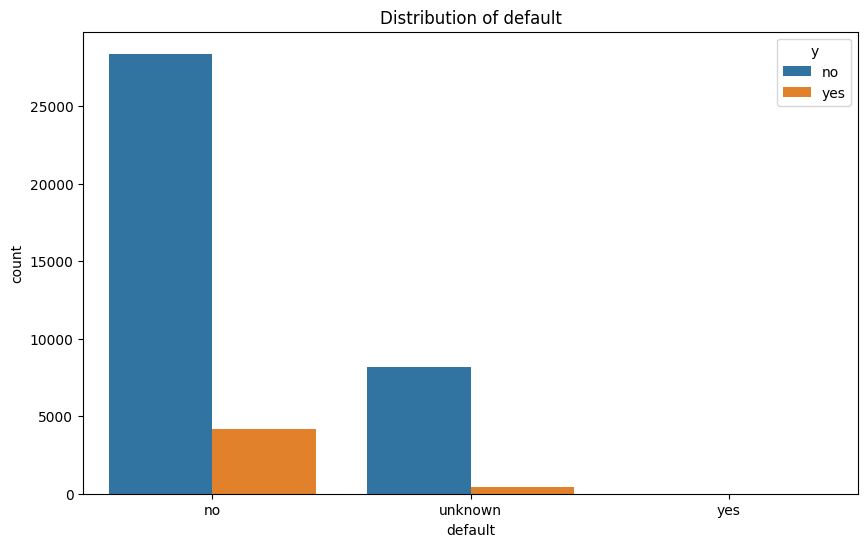

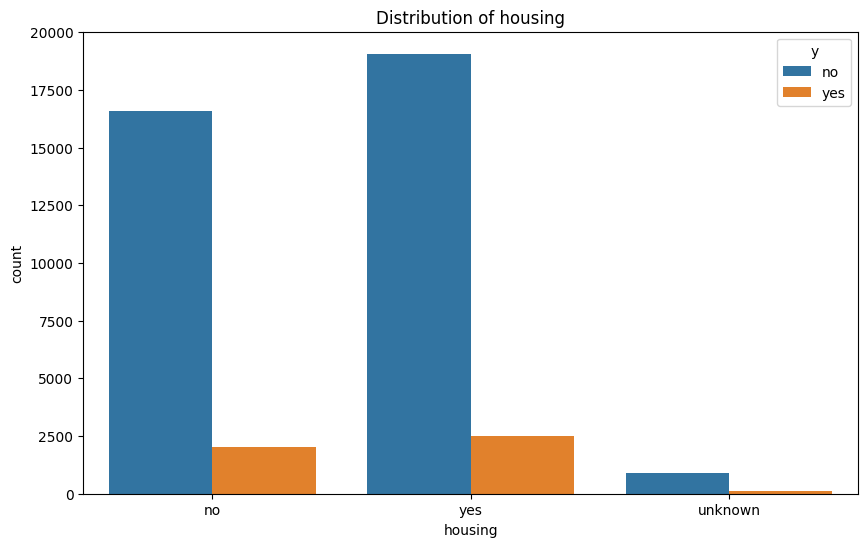

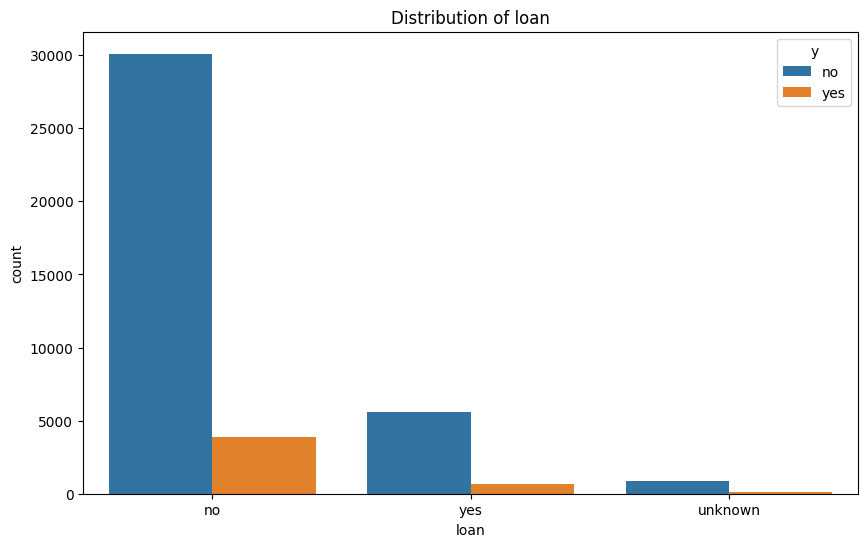

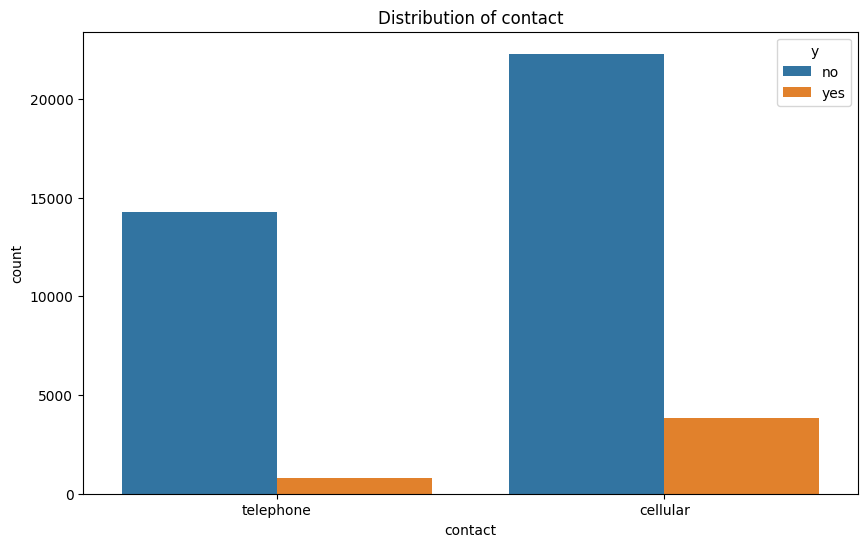

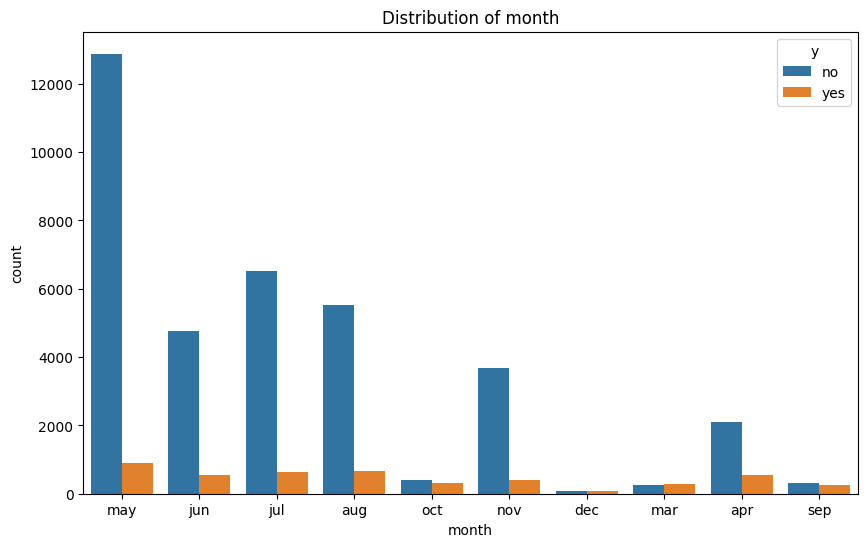

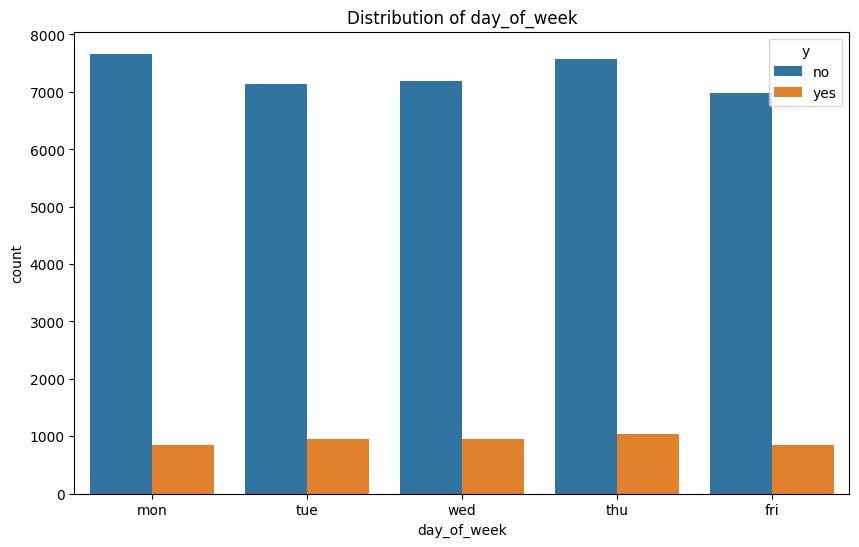

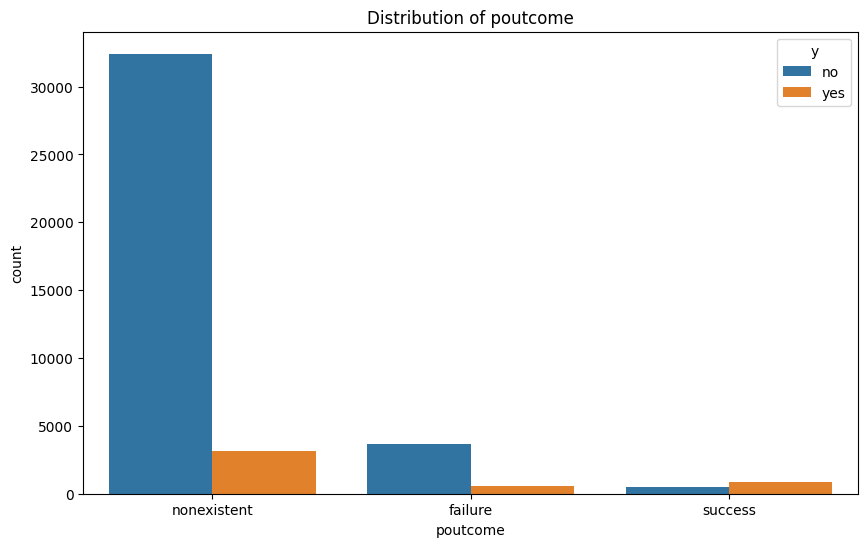

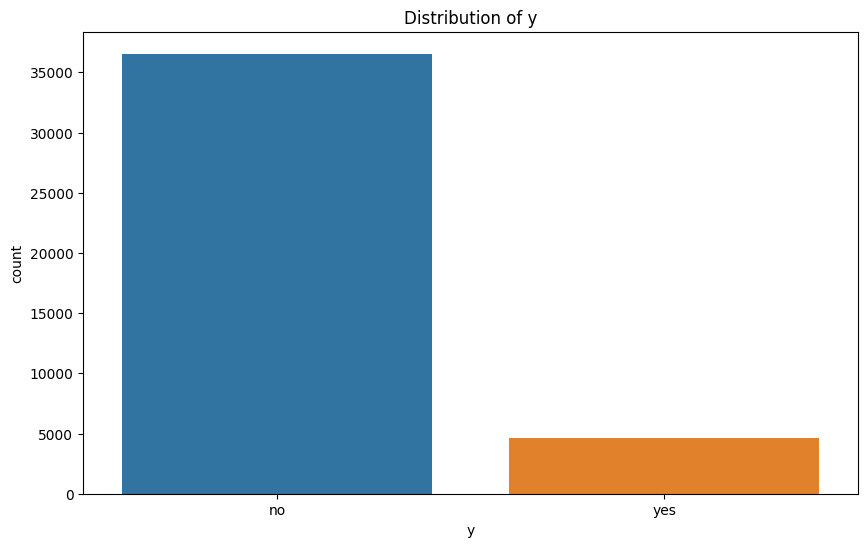

In [12]:
print("categorical vs y")
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='y', data=df)
    plt.title(f"Distribution of {column}")
    plt.show()


numerical vs y


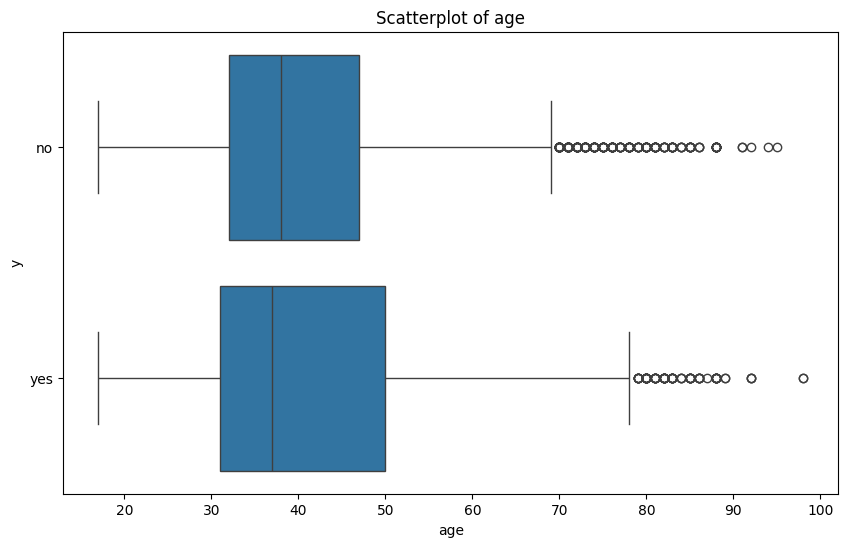

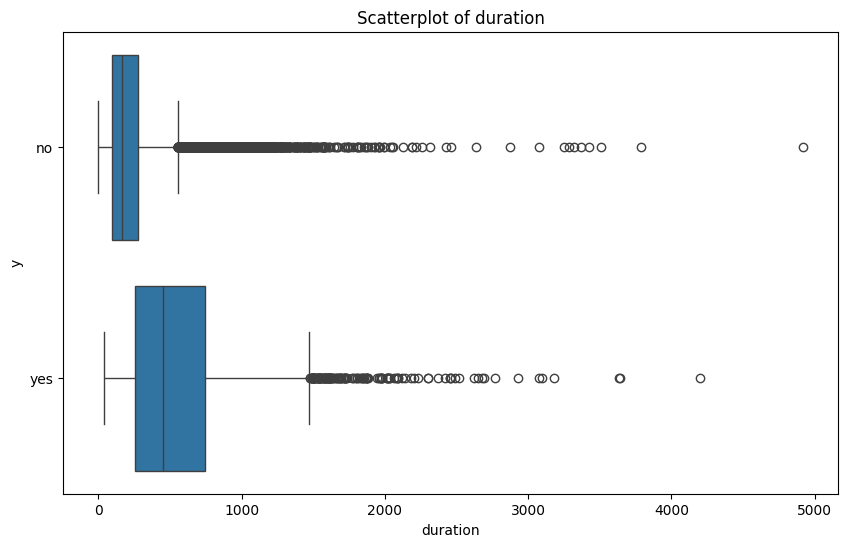

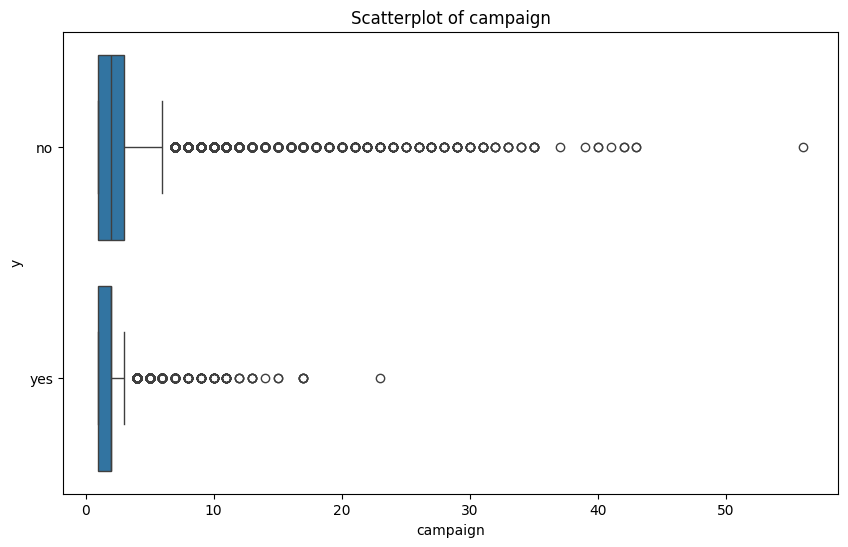

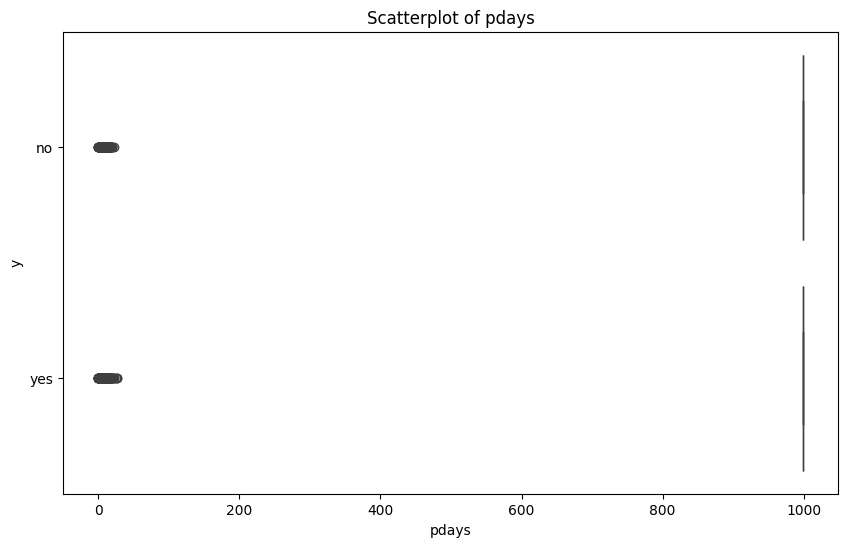

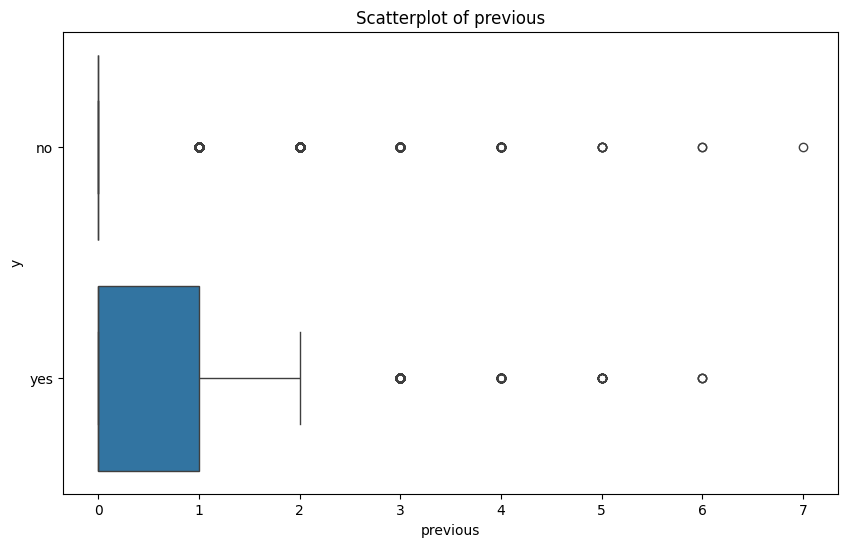

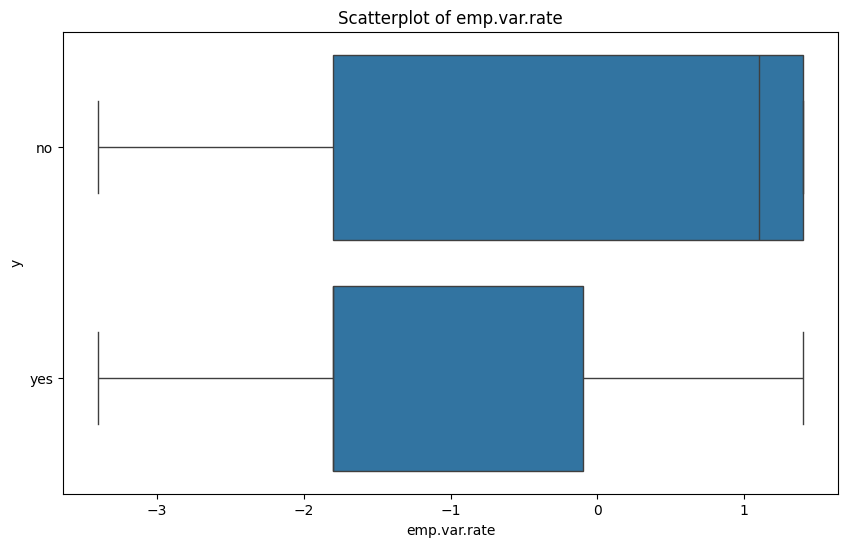

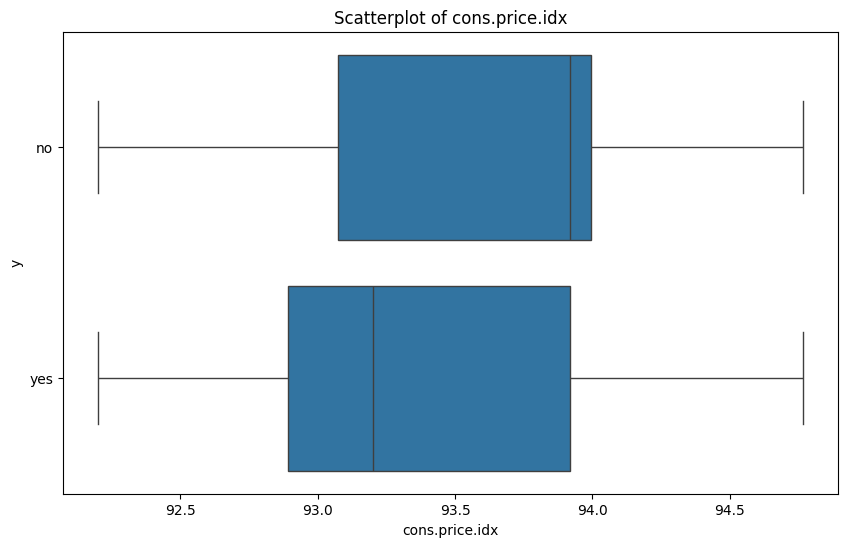

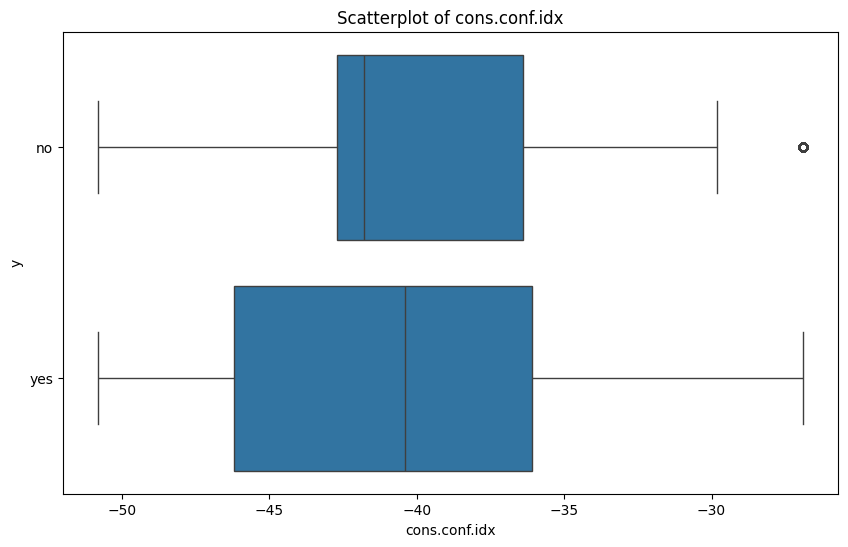

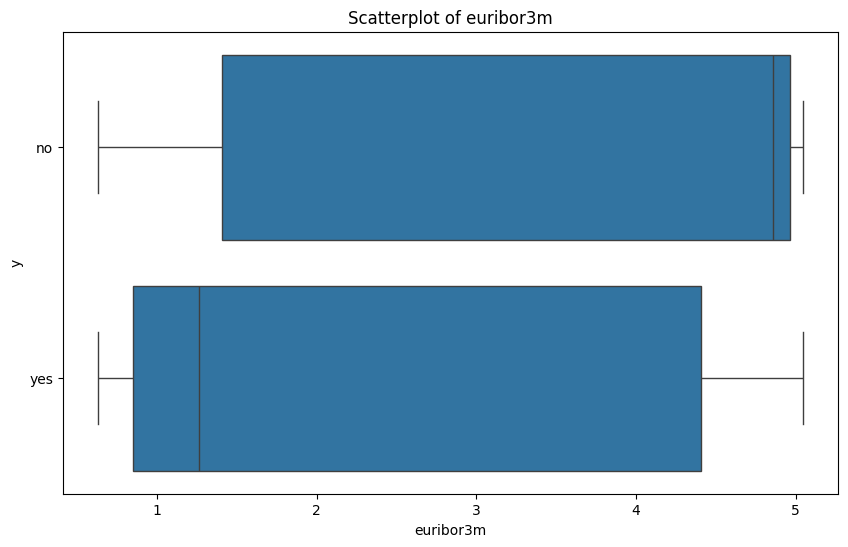

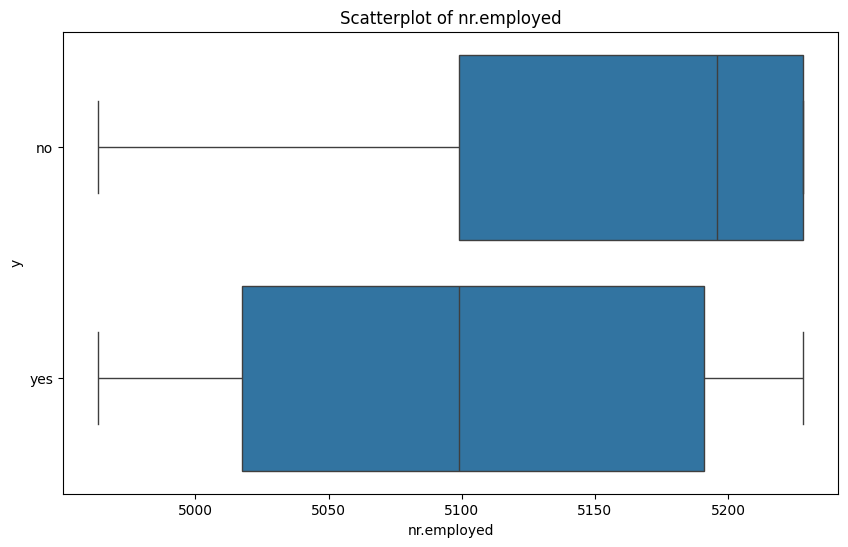

In [13]:
print("numerical vs y")
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='y', data=df)
    plt.title(f"Scatterplot of {column}")
    plt.show()
